# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number: 69

## Student 1 
### Name : Konrad Ponichtera
### ID : 5580749

## Student 2
### Name : Ion Babalau
### ID : 5626110

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

Expected location of dataset: _data_ directory, in same directory as notebook. 
All the necessary packages are specifeid in _requirements.txt_, and can be installed with the command: `pip install -r requirements.txt`

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

## 1. Familiarization task

### 1a. Plot visualizations

#### Reading data set

In [2]:
df = pd.read_csv("data/train_data.csv")
df.head()

,Id,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
0,0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
1,1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
2,2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
3,3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0
4,4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.19008,306.101,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [3]:
df.describe()

,Id,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
count,496800.000000,496800.000000,496800.00000,496800.000000,496800.000000,496800.0,496800.00000,496800.000000,496800.000000,496800.000000,...,496800.000000,496800.0,496800.000000,496800.000000,496800.000000,496800.000000,496800.0,496800.000000,496800.0,496800.0
mean,248399.500000,1.844964,586.09884,1.718364,1.746860,1.0,263.73899,8.387852,348.230699,1.828534,...,1.993281,1.0,250.927892,1.183117,190.271470,0.014376,1.0,1.007915,1.0,0.0
std,143413.951204,1.135332,123.89144,0.458669,0.434811,0.0,4.83595,0.090236,49.422251,1.062482,...,0.081694,0.0,19.699763,0.216984,15.286211,0.148666,0.0,0.088612,0.0,0.0
min,0.000000,0.000000,120.62370,0.000000,1.000000,1.0,244.32840,8.190080,300.845900,0.000000,...,1.000000,1.0,8.891951,0.000000,3.108177,0.000000,1.0,1.000000,1.0,0.0
25%,124199.750000,0.000000,508.24470,1.000000,1.000000,1.0,260.70240,8.349654,327.275100,0.008650,...,2.000000,1.0,249.951900,1.057252,188.974000,0.000000,1.0,1.000000,1.0,0.0
50%,248399.500000,2.491112,525.51590,2.000000,2.000000,1.0,265.28450,8.366636,330.940800,2.443085,...,2.000000,1.0,253.028100,1.121328,191.970000,0.000064,1.0,1.000000,1.0,0.0
75%,372599.250000,2.591679,675.85400,2.000000,2.000000,1.0,266.98280,8.407331,335.324300,2.451671,...,2.000000,1.0,255.030800,1.217441,193.860500,0.000128,1.0,1.000000,1.0,0.0
max,496799.000000,2.745092,1000.00000,2.000000,2.000000,1.0,272.52630,8.988273,567.469900,2.487938,...,2.000000,1.0,264.643700,3.668343,200.637600,1.746131,1.0,2.000000,1.0,0.0


#### Cleaning up the data set

There are values we can safely drop, since they don't bring any additional value, like the row ID and the label, which takes only one value.
What's more, there are certain other features like P-201 or P-202 which take only one value.
This means that checking them can be done through simple assertion, without using machine learning.
Therefore we decided to remove them from the data set.

In [4]:
# Drop useless columns
df = df.drop(columns=['Id', 'Label'])

# Drop colums which take only one value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(columns=[col])

#### Measuring correlation

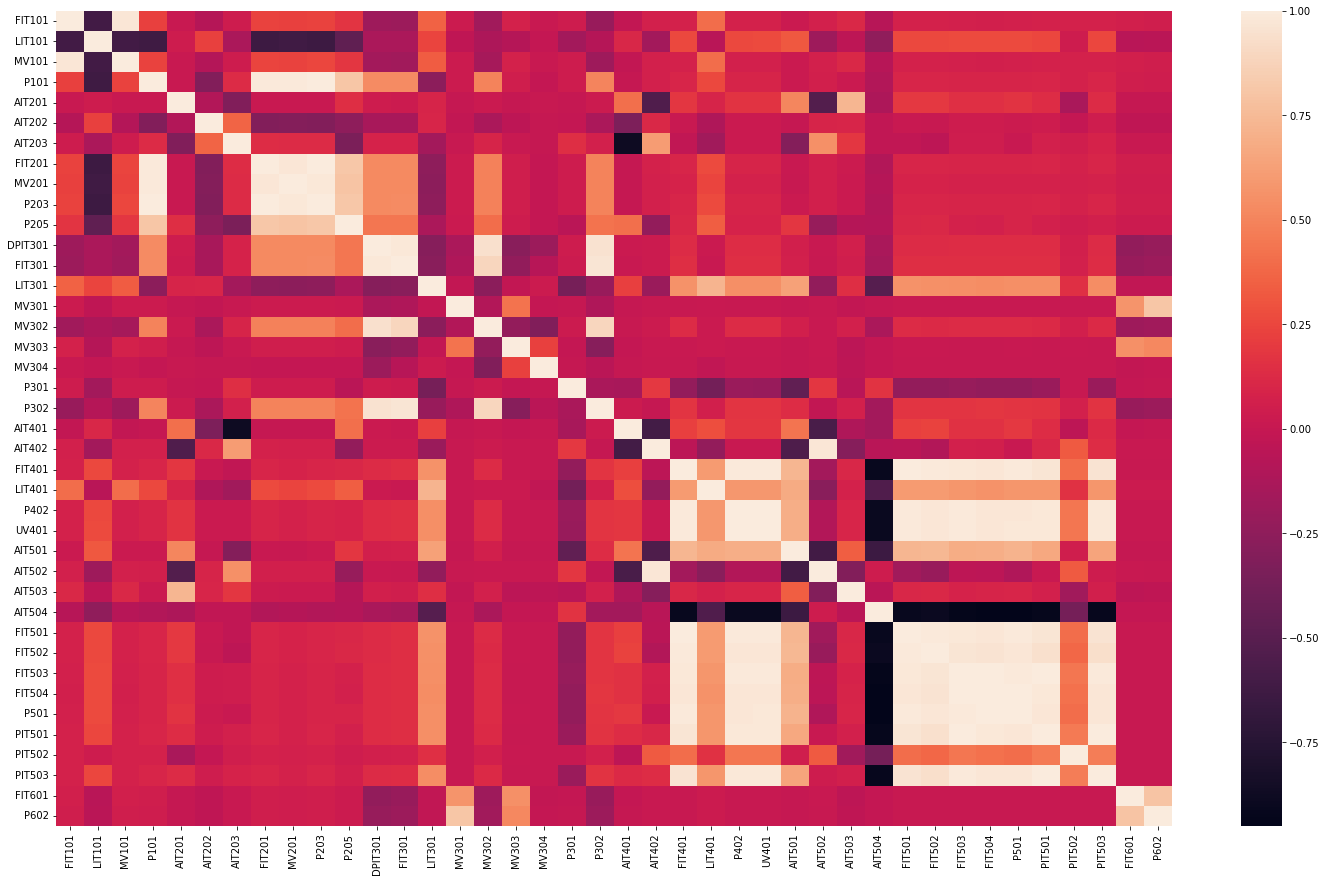

In [5]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr())
plt.show()

#### Observing temporal behavior

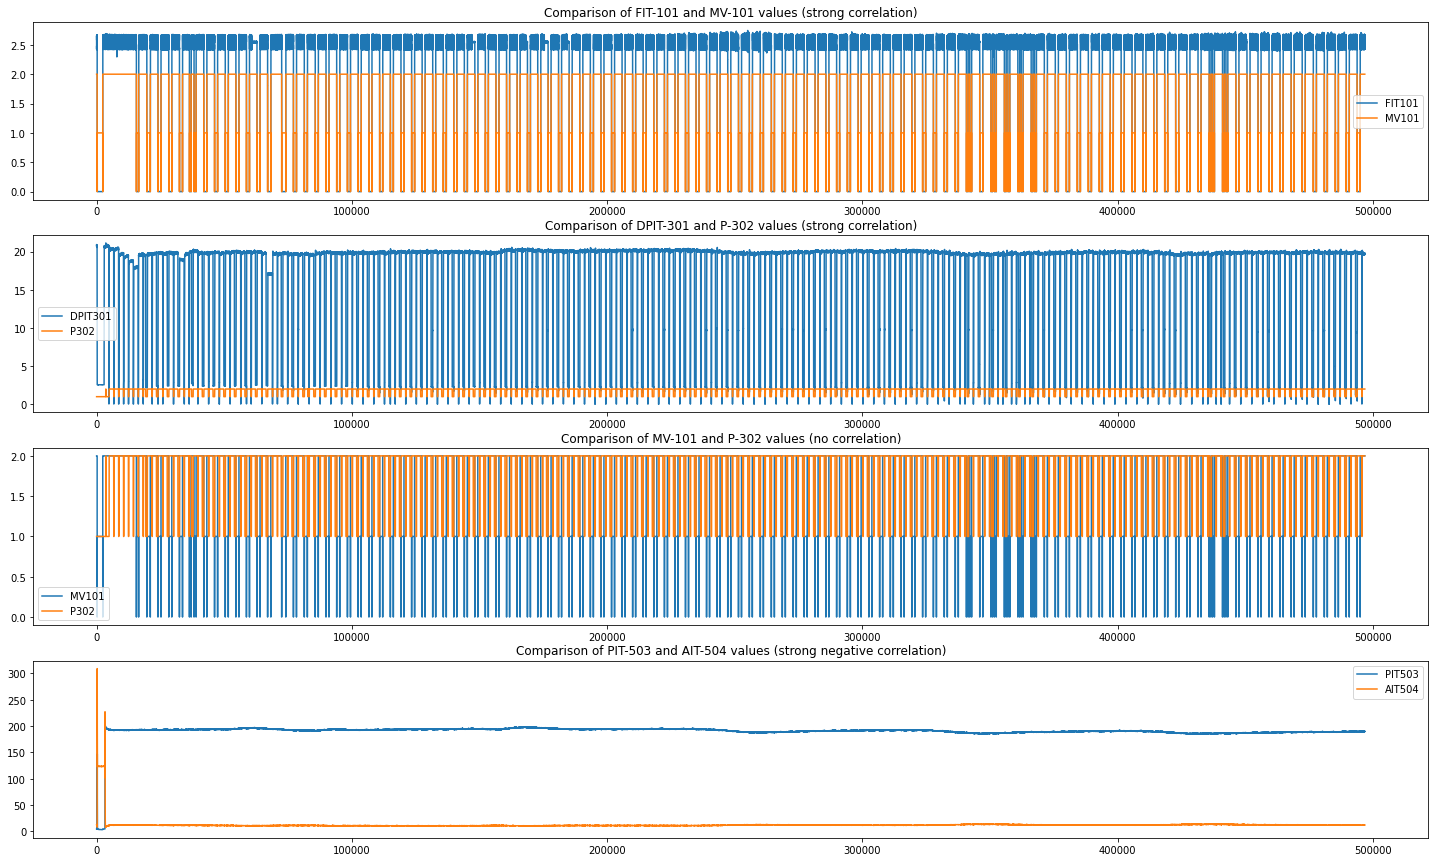

In [6]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(25, 15))
df.plot(ax=ax1, y=['FIT101', 'MV101'], legend=True, title='Comparison of FIT-101 and MV-101 values (strong correlation)')
df.plot(ax=ax2, y=['DPIT301', 'P302'], legend=True, title='Comparison of DPIT-301 and P-302 values (strong correlation)')
df.plot(ax=ax3, y=['MV101', 'P302'], legend=True, title='Comparison of MV-101 and P-302 values (no correlation)')
df.plot(ax=ax4, y=['PIT503', 'AIT504'], legend=True, title='Comparison of PIT-503 and AIT-504 values (strong negative correlation)')
plt.show()

#### Determining potentially abnormal features in the validation set

In [13]:
df_val = pd.read_csv("data/val_data.csv")#[0:25000]

df_val_features = df_val.drop(columns=['Id', 'Timestamp'])
# Multiply label to make it stand out from the rest of the plot
df_val_features['Label'] *= -100

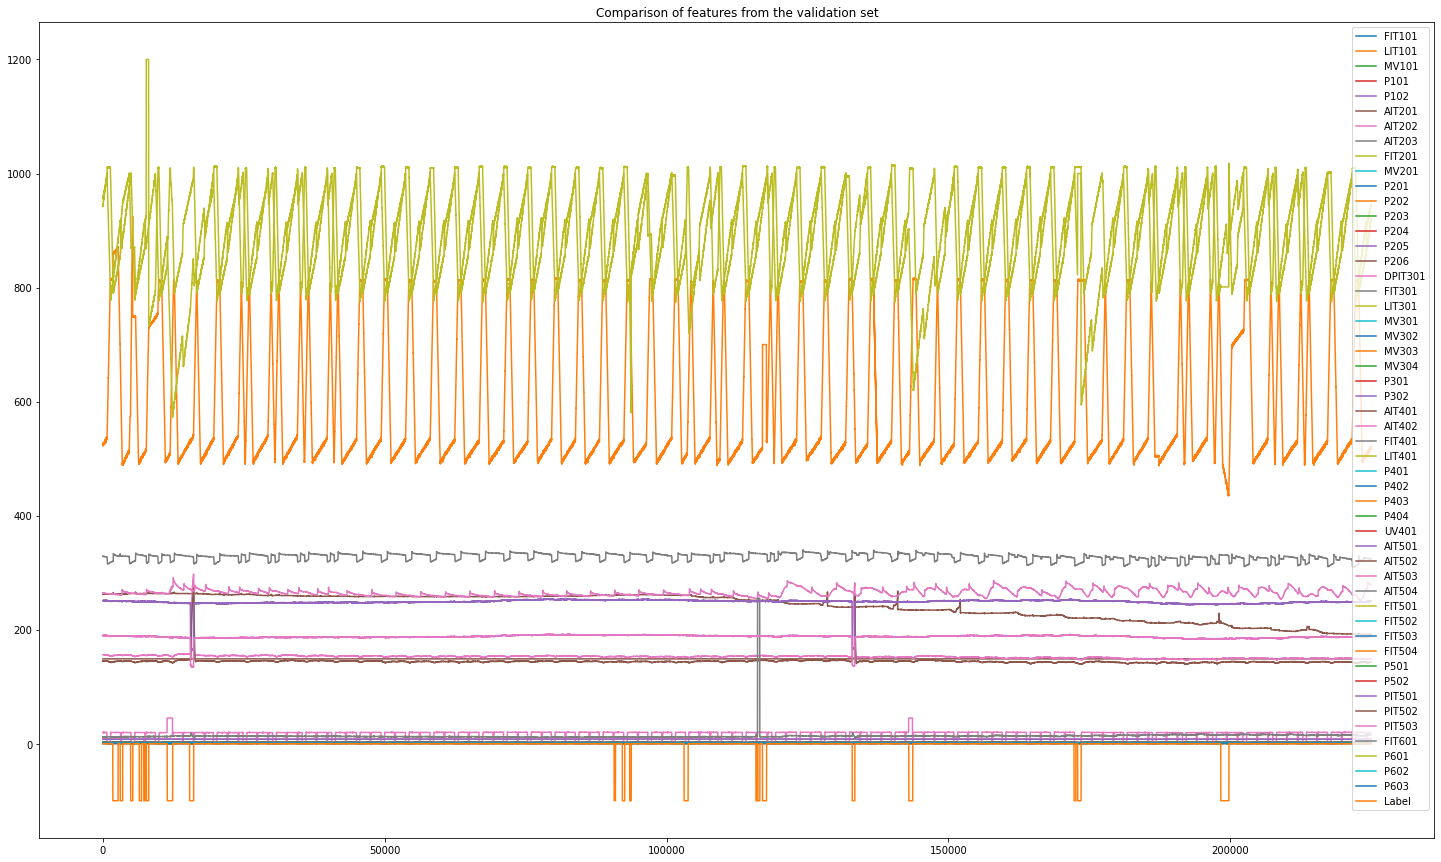

In [14]:
_, ax = plt.subplots(1, 1, figsize=(25, 15))
plt.plot(df_val_features)
ax.legend(labels=df_val_features.columns, loc='upper right')
ax.set_title('Comparison of features from the validation set')
plt.show()

### 1b. Answers to the three questions

#### What types of signals are there?

The data set contains two types of signals, coming from actuators and sensors.
Some data is represented as numerical values (type `float64`) while the others are integers (`int64`) and sometimes can be seen as category labels ()

#### Are the signals correlated? Do they show cyclic behavior?

Looking at the heatmap we can identify certain pairs of features with strong correlation (for instance FIT-101 and MV-101).
Several features seem to show strongly repetitive behavior overtime (eg. DPIT-301 and P-302).
Some feature (eg. P-201 and P-202) take only one value in the data set, which is why they are represented as white strips on the heatmap.
There are exceptions as well - for example the PIT-503 and the values it is correlated with (eg. FIT-401) seems to revolve around certain value, but do not seem to have any specific cyclic behavior.

In the beginning the behavior of the system is highly irregular for all the features.
The reason might be the fact that the system might have been initializing then.
For this reason it might be beneficial to prune the first 40000 entries before training the anomaly detection machine learning algorithms.

## 2. LOF task – Individual

*Author: Konrad Ponichtera*

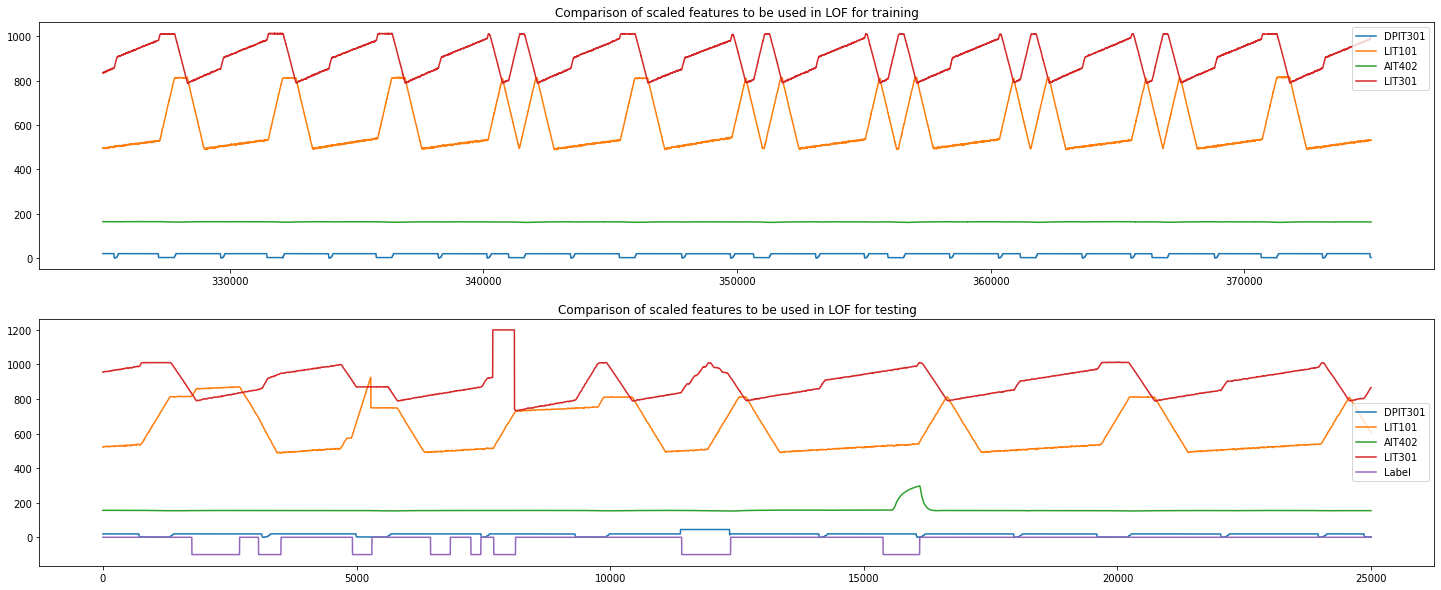

In [9]:
features = ['DPIT301', 'LIT101', 'AIT402', 'LIT301']
features_for_plot = features + ['Label']

X_train = df[features][325000:375000]
y_test = df_val_features[features]
y_test_for_plot = df_val_features[features_for_plot]

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.copy())

#scaler = StandardScaler()
#y_train_scaled = scaler.fit_transform(y_train.copy())

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(X_train)
ax1.legend(labels=features)
ax1.set_title('Comparison of scaled features to be used in LOF for training')
ax2.plot(y_test_for_plot)
ax2.legend(labels=features_for_plot)
ax2.set_title('Comparison of scaled features to be used in LOF for testing')
fig.show()

### 2a. Plot LOF scores

In [10]:
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, metric='cosine', n_jobs=-1)
clf.fit(X_train)

LocalOutlierFactor(metric='cosine', n_jobs=-1, novelty=True)

In [11]:
X_scores = clf.score_samples(y_test)
X_scores *= -1

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


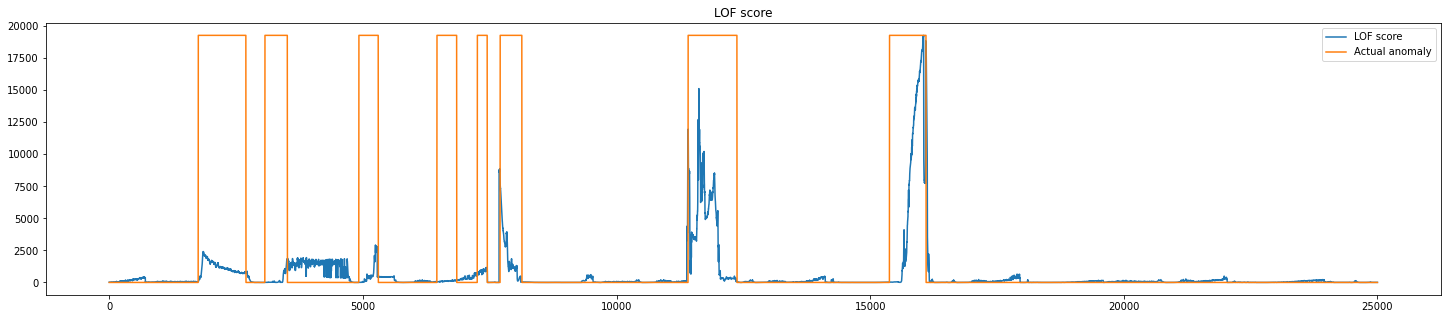

In [12]:
anomaly = pd.DataFrame({"LOF score": X_scores, "Anomaly": df_val['Label'] * X_scores.max()})

_, ax = plt.subplots(1, 1, figsize=(25, 5))
plt.plot(anomaly)
ax.set_title('LOF score')
ax.legend(labels=['LOF score', 'Actual anomaly'])
plt.show()

### 2b. Analysis and answers to the questions

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – Individual

*Author: Konrad Ponichtera*

The feature of choice for this task is LIT101.

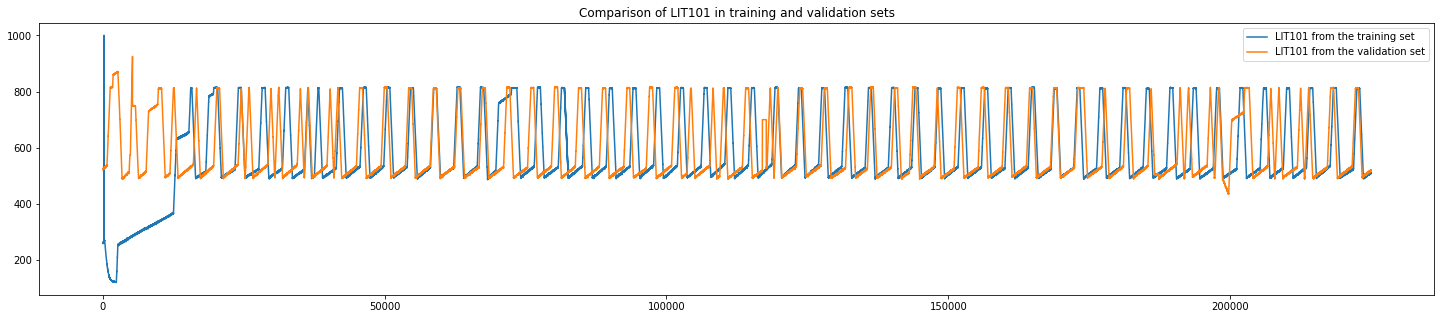

In [35]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))
feature = 'LIT101'
df[0:len(df_val_features)].plot(ax=ax, y=[feature])
df_val_features.plot(ax=ax, y=[feature])
ax.legend(labels=[f'{feature} from the training set', f'{feature} from the validation set'])
ax.set_title(f'Comparison of {feature} in training and validation sets')
plt.show()

In [72]:
df_val_features.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Label
count,224959.000000,224959.000000,224959.000000,224959.000000,224959.000000,224959.000000,224959.000000,224959.000000,224959.000000,224959.000000,...,224959.000000,224959.0,224959.000000,224959.000000,224959.000000,224959.000000,224959.0,224959.000000,224959.0,224959.000000
mean,1.846564,594.480208,1.715806,1.747621,1.008393,241.249162,8.441352,327.741771,1.834096,1.743918,...,1.995439,1.0,248.820396,1.259742,187.719134,0.017785,1.0,1.009735,1.0,-4.905783
std,1.134440,113.194120,0.463388,0.434379,0.091226,22.400223,0.095689,6.197304,1.063665,0.445959,...,0.067380,0.0,5.987485,0.334241,3.957448,0.165032,0.0,0.098185,0.0,21.598927
min,0.000000,434.881300,0.000000,1.000000,1.000000,191.585500,6.000000,308.767000,0.000000,0.000000,...,1.000000,1.0,163.884300,0.000000,134.468700,0.000000,1.0,1.000000,1.0,-100.000000
25%,0.000000,509.226000,1.000000,1.000000,1.000000,224.429600,8.389708,323.429900,0.128344,1.000000,...,2.000000,1.0,247.596800,0.961138,186.618800,0.000000,1.0,1.000000,1.0,0.000000
50%,2.497838,527.557100,2.000000,2.000000,1.000000,253.845200,8.441618,329.633400,2.445391,2.000000,...,2.000000,1.0,249.279000,1.409669,188.012700,0.000128,1.0,1.000000,1.0,0.000000
75%,2.584313,689.396200,2.000000,2.000000,1.000000,259.004100,8.483595,332.607000,2.451158,2.000000,...,2.000000,1.0,250.865200,1.569859,189.342500,0.000128,1.0,1.000000,1.0,0.000000
max,2.706659,925.032300,2.000000,2.000000,2.000000,267.719800,8.633556,340.169200,2.823695,2.000000,...,2.000000,1.0,253.909300,1.970333,191.986000,1.745363,1.0,2.000000,1.0,0.000000


### 5a. Visualise discretization

In [154]:
df_feature = df[[feature]]

discretizer = KBinsDiscretizer(n_bins=12, strategy='uniform', encode='ordinal')
discretizer.fit(df_feature)
df_feature_discretized = discretizer.transform(df_feature.copy())[:, 0]

vectorizer = np.vectorize(lambda x: discretizer.bin_edges_[0][int(x)])
df_feature_discretized = vectorizer(df_feature_discretized)

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


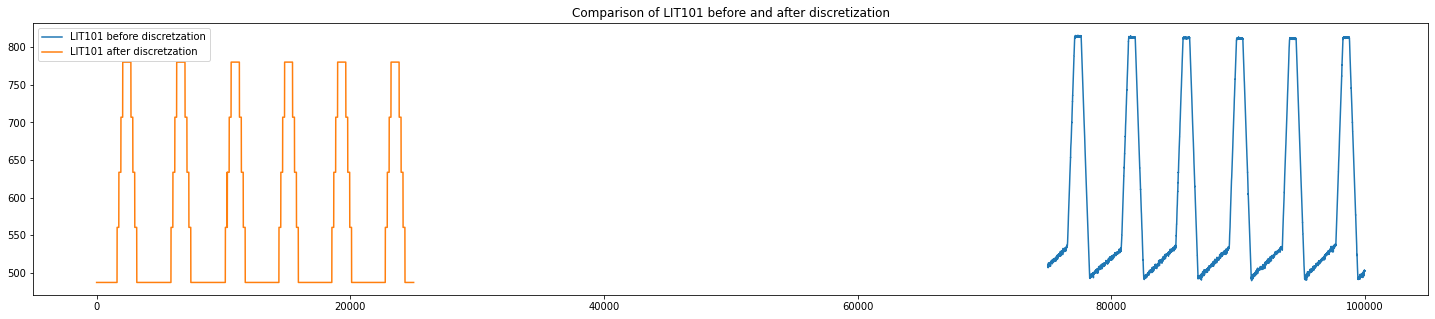

In [160]:
_, ax = plt.subplots(1, 1, figsize=(25, 5))
#df[75000:100000].plot(ax=ax, y=[feature])

scaler = StandardScaler()
scaler.fit(df_feature)

df_feature_scaled = scaler.transform(df_feature.copy())
df_feature_discretized_scaled = scaler.transform(df_feature_discretized.copy().reshape(-1, 1))

ax.plot(df_feature[75000:100000])
ax.plot(df_feature_discretized[75000:100000])

ax.legend(labels=[f'{feature} before discretzation', f'{feature} after discretzation'])
ax.set_title(f'Comparison of {feature} before and after discretization')
plt.show()

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.